In [1]:
from tqdm import tqdm
from pandas import read_excel
from sentence_transformers import SentenceTransformer


class EmbeddingValidator:
    def __init__(self, model_name: str = "BAAI/bge-m3") -> None:
        self.model = SentenceTransformer(model_name)

    def validate(self, reference: str, translated: str) -> float:
        emb_reference = self.model.encode(reference)
        emb_translated = self.model.encode(translated)
        return emb_reference @ emb_translated.T

/Users/S94816/Library/Caches/pypoetry/virtualenvs/llm-uncertainty-estimation-sJzuWyw4-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
th = read_excel("../data/input/thai_exams.xlsx")
en = read_excel("../data/input/thai_exams_translated.xlsx")
df = (
    th[["question", "ID"]]
    .merge(
        en[["en_question", "ID"]],
        on="ID",
        how="inner",
    )
)

In [3]:
df.head(5)

,question,ID,en_question
0,ข้อใดกล่าวไม่ถูกต้องเกี่ยวกับแสง,a_level_001,Which of the following statements is incorrect...
1,ข้อใดกล่าวถึงสิทธานุมัติทางสังคมได้ถูกต้อง,a_level_002,Which of the following correctly describes soc...
2,ข้อใดต่อไปนี้เป็นการแสดงออกถึงอุณหภูมิอากาศในแ...,a_level_003,Which of the following expresses air temperatu...
3,ประโยคใดมีเจตนาต่างกับคำอื่น,a_level_004,Which sentence has a different intention from ...
4,ข้อใดเป็นการพิจารณาโดยใช้คำพูดอุปมัย,a_level_005,Which of the following is a consideration usin...


In [4]:
validator = EmbeddingValidator()

similarities = []
for _, row in tqdm(df.iterrows(), total=len(df)):
    # calculate similarity
    reference = row["question"]
    translated = row["en_question"]
    similarity = validator.validate(reference, translated)
    similarities.append(similarity)

# save similarity
df["similarity"] = similarities
df.to_csv("../data/analysis/translation.csv", index=False)

100%|██████████| 590/590 [01:13<00:00,  7.98it/s]


<Axes: >

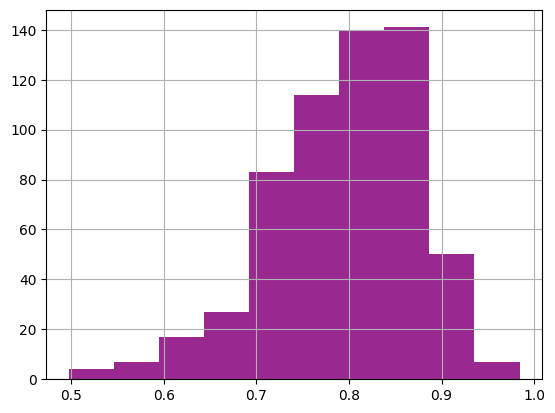

In [5]:
df["similarity"].hist(color="#992990")

In [7]:
num = len(df.query("similarity > 0.7"))
denom = len(df)
num / denom

0.888135593220339